# K-Nearest Neighbors Classifier - the Random Dataset

### Import necessary libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# make_blobs create normally distributed points around a specified center
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

from mlxtend.plotting import plot_decision_regions

### Generating database

In [2]:
inputs, target = make_blobs(n_samples = 1000, 
                            centers = [(-3, 3), (0, 0), (2, 2)],
                            random_state = 365)

In [3]:
inputs.shape, target.shape

((1000, 2), (1000,))

In [4]:
data = pd.DataFrame(data = inputs, columns = ['Feature 1', 'Feature 2'])
data['Target'] = target
data

,Feature 1,Feature 2,Target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0
...,...,...,...
995,-4.412271,2.420197,0
996,0.398022,-0.847863,1
997,-0.588974,0.317711,1
998,-2.328593,4.957489,0


### Plotting database

In [5]:
knn_palette = sns.color_palette(['#000C1F', '#29757A', '#FF5050'])

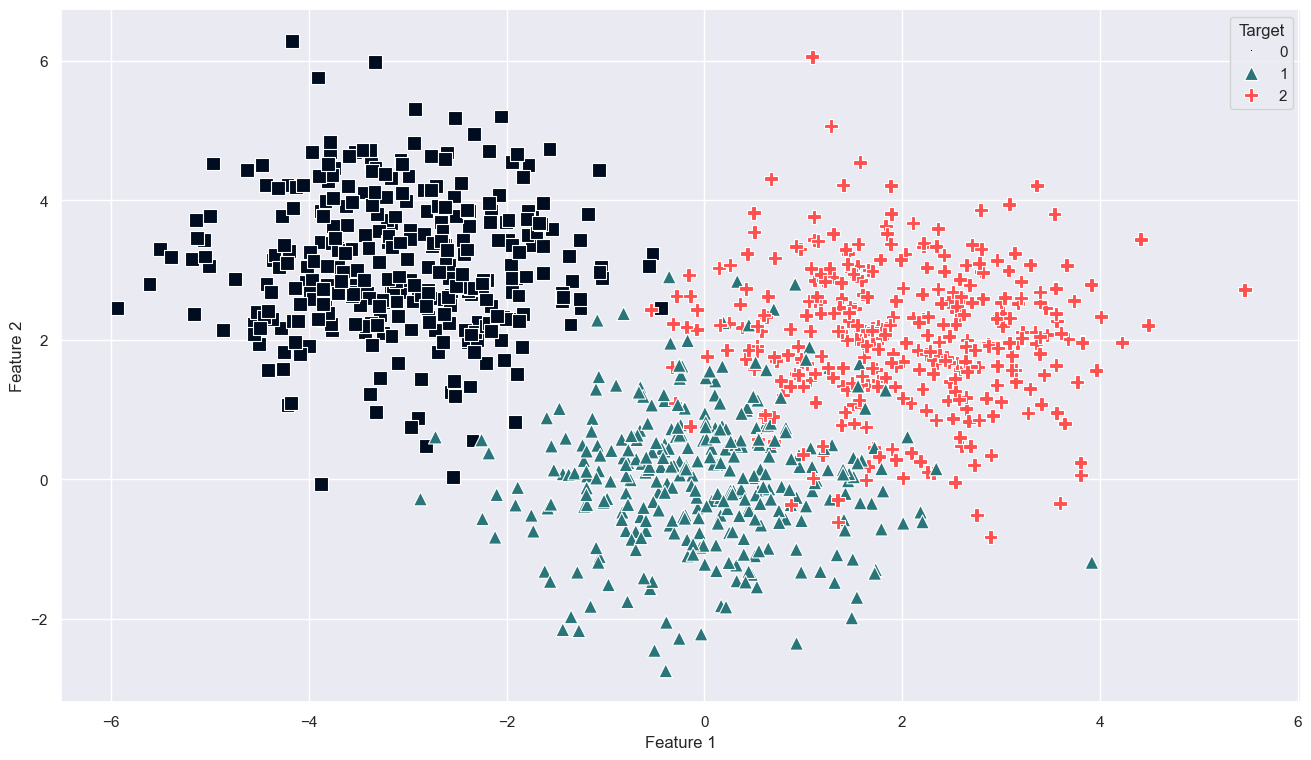

In [6]:
sns.set()
plt.figure(figsize = (16, 9))
sns.scatterplot(x='Feature 1', y='Feature 2',
               data = data,
               hue = 'Target',
               palette = knn_palette,
               markers = [',', '^', 'P'],
               style = 'Target',
               s = 100);

### Visualizing the distribution of the points

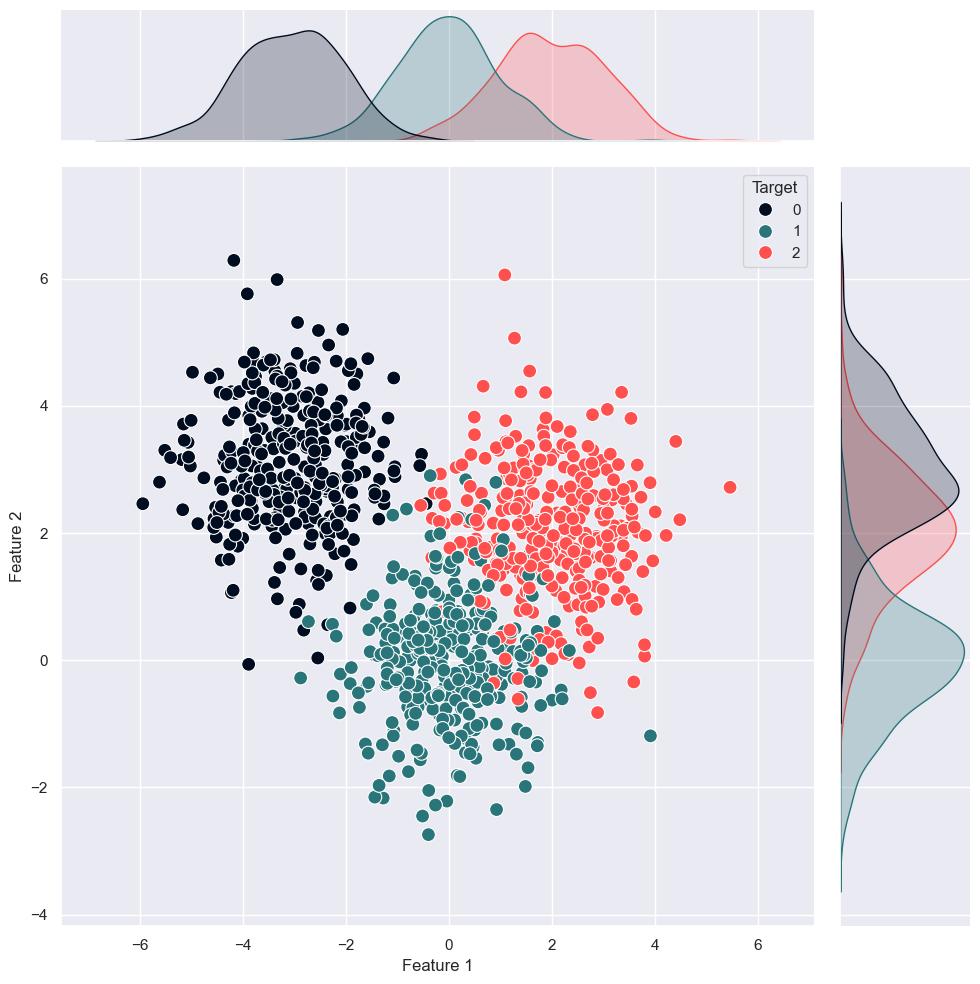

In [7]:
sns.set()

sns.jointplot(x = 'Feature 1', y = 'Feature 2',
             data = data,
             hue = 'Target',
             palette = knn_palette,
             height = 10,
             s = 100,
             legend = True);

### Creating a train-test-split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                   test_size = 0.2,
                                                   random_state = 365,
                                                   stratify = target)

### Creating the model

In [9]:
clf = KNeighborsClassifier(n_neighbors = 30, weights = 'uniform') 
clf.fit(x_train, y_train)

,n_neighbors,30
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Predicting a sample

In [10]:
feature_1 = -0.18
feature_2 = 3.2

In [11]:
clf.predict([[feature_1, feature_2]])

array([2])

In [34]:
neighbors = clf.kneighbors([[feature_1, feature_2]])

### Visualizing the neighbors

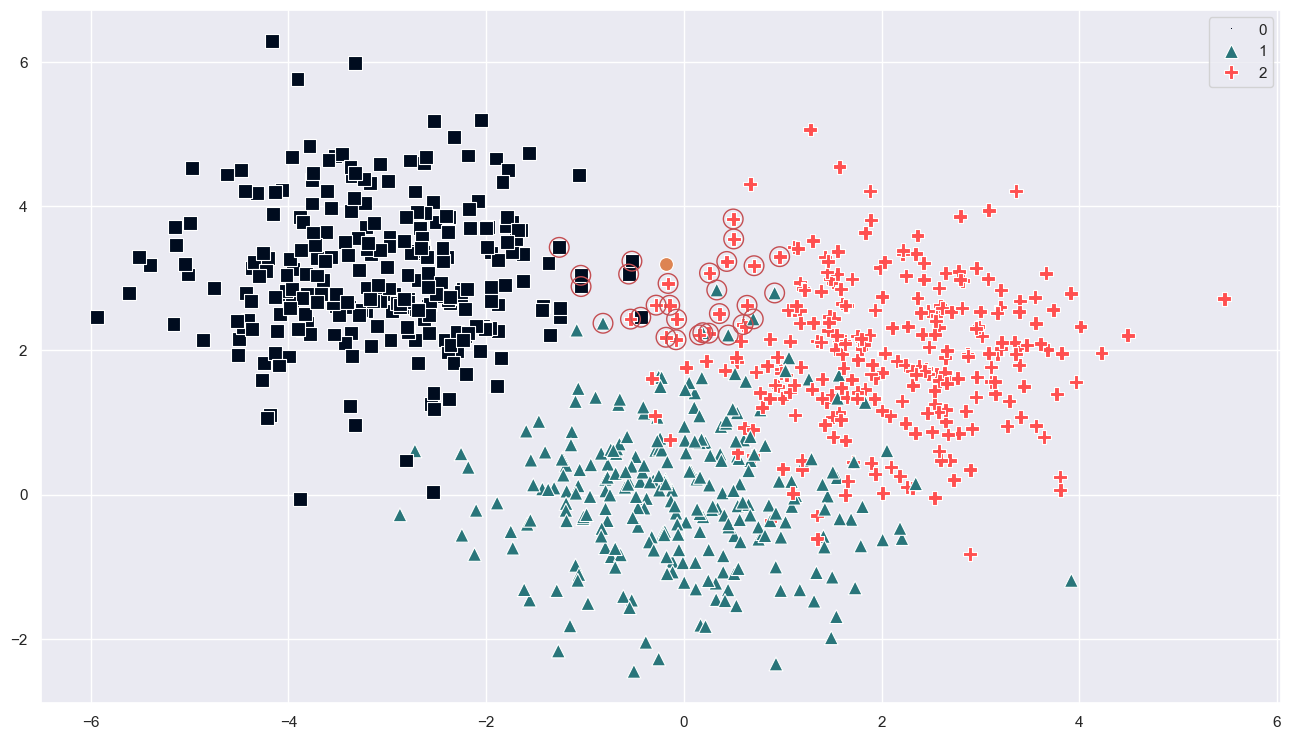

In [13]:
sns.set()
plt.figure(figsize = (16, 9))

sns.scatterplot(x = x_train[:, 0], y = x_train[:, 1],
               hue = y_train,
               palette = knn_palette,
               markers = [',', '^', 'P'],
               style = y_train,
               s = 100,
               legend = True);

sns.scatterplot(x = [feature_1], y = [feature_2],
               markers = ['o'],
               style = [feature_2],
               s = 100,
               legend = False);

plot_x_train = []
plot_y_train = []

for i in neighbors[1]:
    plot_x_train.append(x_train[i, 0])
    plot_y_train.append(x_train[i, 1])

plt.scatter(plot_x_train,
           plot_y_train,
           s = 200,
           facecolors = 'none',
           edgecolors = 'r');

### Getting the parameters of the model

In [14]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 30,
 'p': 2,
 'weights': 'uniform'}

### Drawing the decision regions

In [15]:
x_train.shape

(800, 2)

Time elapsed: 6.5 seconds


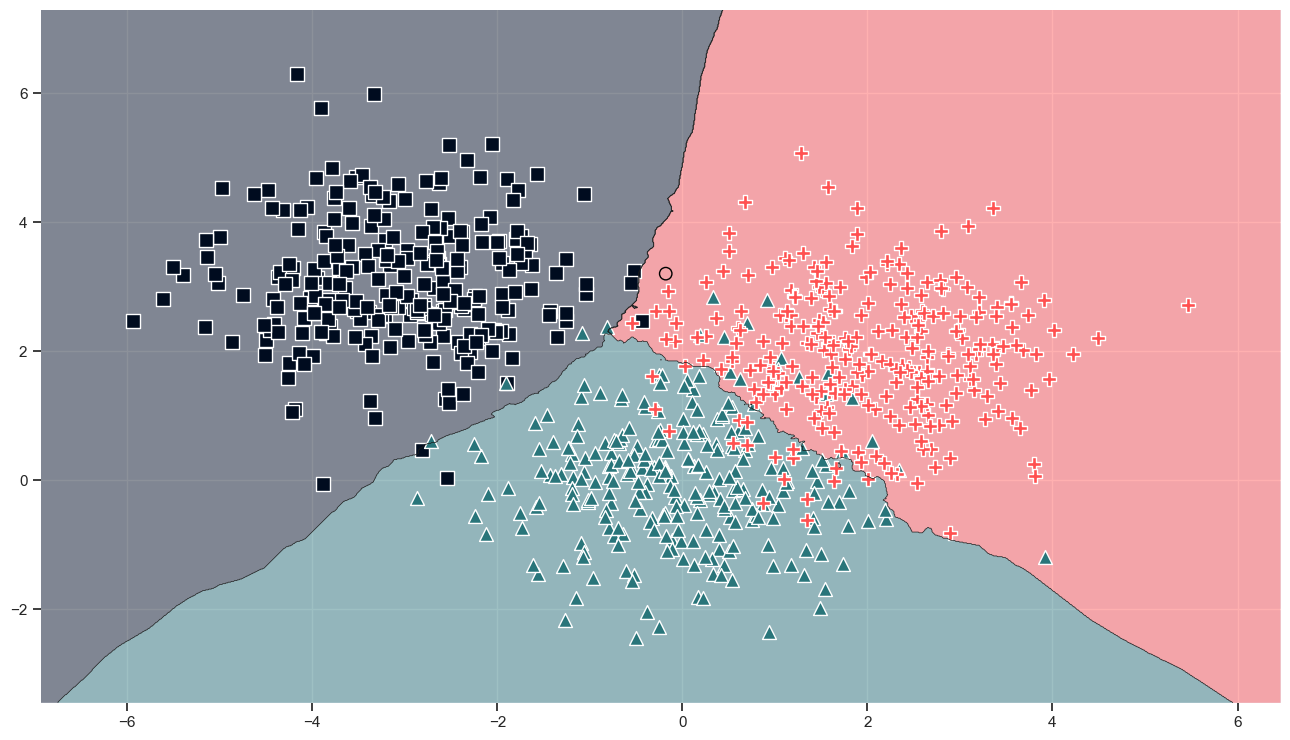

In [16]:
start = time.time()

plt.figure(figsize = (16, 9))

plot_decision_regions(X = x_train, y = y_train, 
                      X_highlight = np.array([[feature_1, feature_2]]),
                      clf = clf,
                      markers = [',', '^', 'P'], 
                      colors = '#000c1f,#29757a,#ff5050',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 0)

end = time.time()

print(f'Time elapsed: {round(end - start, 1)} seconds')

### Getting the error rates of a set of models

In [17]:
error_uniform = []
error_distance = []

k_range = range(1, 51)

for k in k_range:
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_uniform.append(1 - accuracy_score(y_test, predictions))

    clf = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_distance.append(1 - accuracy_score(y_test, predictions))

### Plotting the error rates as a function of the number of neighbors

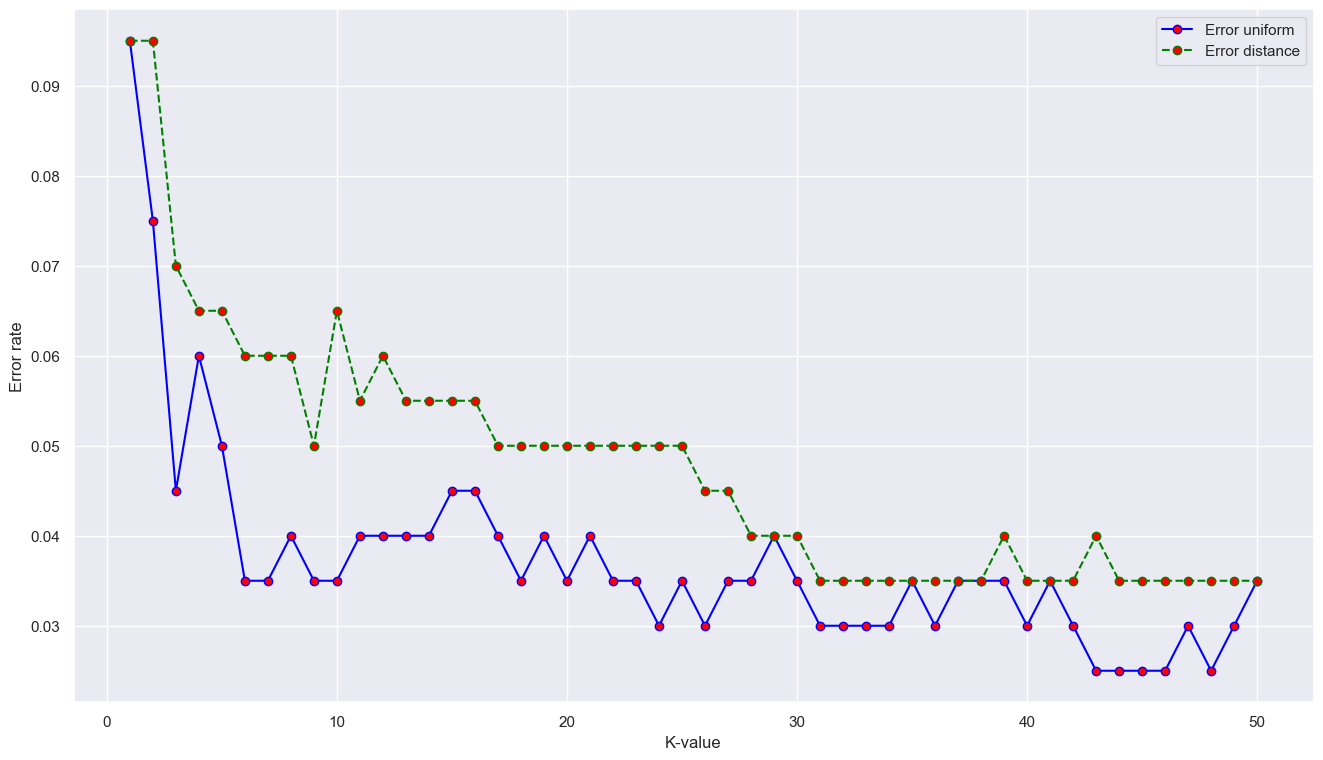

In [18]:
plt.figure(figsize = (16, 9))

plt.plot(k_range, error_uniform,
        c = 'blue', linestyle = 'solid',
        marker = 'o', markerfacecolor = 'red',
        label = 'Error uniform')

plt.plot(k_range, error_distance,
        c = 'green', linestyle = 'dashed',
        marker = 'o', markerfacecolor = 'red',
        label = 'Error distance')

plt.legend()

plt.xlabel('K-value')
plt.ylabel('Error rate');

### Choosing a set of parameters to test

In [19]:
parameters = {'n_neighbors': range(1, 51),
             'weights': ['uniform', 'distance']}

### Create an instance of the GridSearchCV class

In [20]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                          param_grid = parameters,
                          scoring = 'accuracy')

In [21]:
grid_search.fit(x_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': range(1, 51), 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,10


In [22]:
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [23]:
clf = grid_search.best_estimator_

In [24]:
clf

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [25]:
grid_search.best_score_

np.float64(0.9512499999999999)

### Make predictions on the test dataset

In [26]:
y_test_pred = clf.predict(x_test)
y_test_pred.shape

(200,)

### Construct the confusion matrix

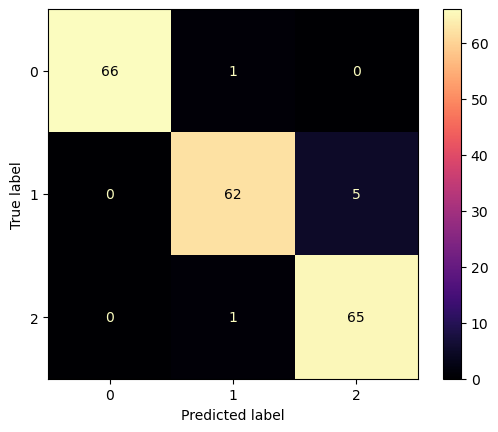

In [32]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred, 
    labels = clf.classes_,
    cmap = 'magma'
)

plt.show()

### Print out the classification report

In [33]:
print(classification_report(y_test, y_test_pred, target_names = ['0', '1', '2']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      0.93      0.95        67
           2       0.93      0.98      0.96        66

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

